In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Импортируйте датасет в ноутбук средствами pandas
---

In [3]:
df = pd.read_csv('./wishes_character_event.csv')
df

,date,item,type,quality
0,2020-10-01,barbara,character,4
1,2020-10-01,NaN,weapon,3
2,2020-10-01,NaN,weapon,3
3,2020-10-01,NaN,weapon,3
4,2020-10-01,NaN,weapon,3
...,...,...,...,...
1181,2022-11-18,black tassel,weapon,3
1182,2022-11-18,magic guide,weapon,3
1183,2022-11-18,sacrificial greatsword,weapon,3
1184,2022-11-19,debate club,weapon,3


Посмотрите на первые 5 строк датафрейма и последние 5 строк датафрейма
---

In [4]:
df.head(5)

,date,item,type,quality
0,2020-10-01,barbara,character,4
1,2020-10-01,NaN,weapon,3
2,2020-10-01,NaN,weapon,3
3,2020-10-01,NaN,weapon,3
4,2020-10-01,NaN,weapon,3


In [5]:
df.tail(5)

,date,item,type,quality
1181,2022-11-18,black tassel,weapon,3
1182,2022-11-18,magic guide,weapon,3
1183,2022-11-18,sacrificial greatsword,weapon,3
1184,2022-11-19,debate club,weapon,3
1185,2022-11-19,raven bow,weapon,3


Выведите информацию о типах данных в наборе, а также основную статистическую информацию о данных

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1186 non-null   object
 1   item     943 non-null    object
 2   type     1186 non-null   object
 3   quality  1186 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 37.2+ KB


,quality
count,1186.000000
mean,3.161889
std,0.407646
min,3.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,5.000000


Удалите дубликаты строк

In [7]:
df.drop_duplicates(inplace=True)
df

,date,item,type,quality
0,2020-10-01,barbara,character,4
1,2020-10-01,NaN,weapon,3
9,2020-10-01,NaN,weapon,4
13,2020-10-01,xiangling,character,4
23,2020-10-01,fischl,character,4
...,...,...,...,...
1173,2022-11-18,layla,weapon,3
1178,2022-11-18,bloodtainted greatsword,weapon,3
1183,2022-11-18,sacrificial greatsword,weapon,3
1184,2022-11-19,debate club,weapon,3


Удалите из датафрейма (если есть соответствующие поля) такие поля, как ID объектов. Переименуйте произвольное поле датафрейма.
---

In [8]:
df = df.rename(columns={'quality': 'rarity'})
df

,date,item,type,rarity
0,2020-10-01,barbara,character,4
1,2020-10-01,NaN,weapon,3
9,2020-10-01,NaN,weapon,4
13,2020-10-01,xiangling,character,4
23,2020-10-01,fischl,character,4
...,...,...,...,...
1173,2022-11-18,layla,weapon,3
1178,2022-11-18,bloodtainted greatsword,weapon,3
1183,2022-11-18,sacrificial greatsword,weapon,3
1184,2022-11-19,debate club,weapon,3


С помощью библиотек matplotlib, seaborn и pandas постройте следующие диаграммы:
---

гистограмму распределения любого числового признака

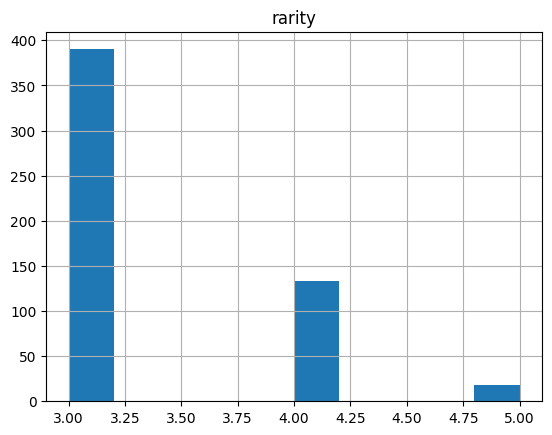

In [9]:
df.hist('rarity')
plt.savefig('rarity_hist.png')

диаграмму «ящик с усами» для любого числового признака

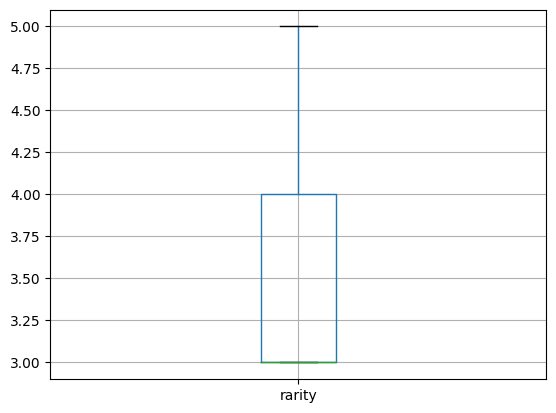

In [10]:
df.boxplot('rarity')
plt.savefig('rarity_boxplot.png')

круговую диаграмму

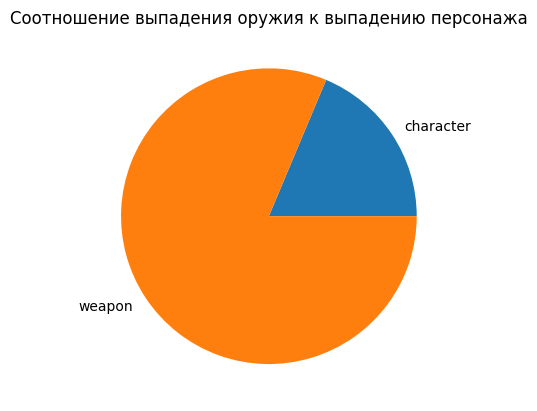

In [11]:
plt.pie([df.groupby(['type']).size().to_frame().loc['character'][0], df.groupby(['type']).size().to_frame().loc['weapon'][0]], labels=['character', 'weapon'])
plt.title("Соотношение выпадения оружия к выпадению персонажа")
plt.savefig('character_to_weapon_pie.png')

тепловую карту со значениями взаимной корреляции между всеми парами признаков набора данных

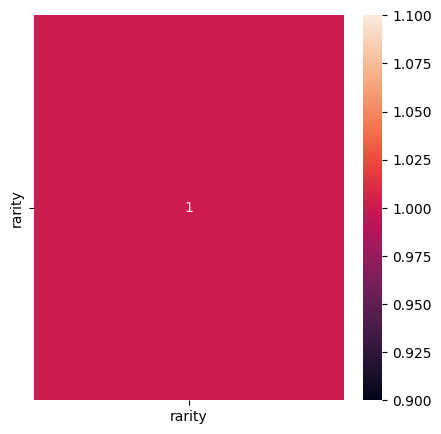

In [12]:
buf = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(buf, annot=True, ax=ax)
plt.savefig('heatmap.png')

диаграмму countplot с группировкой по двум номинативным признакам

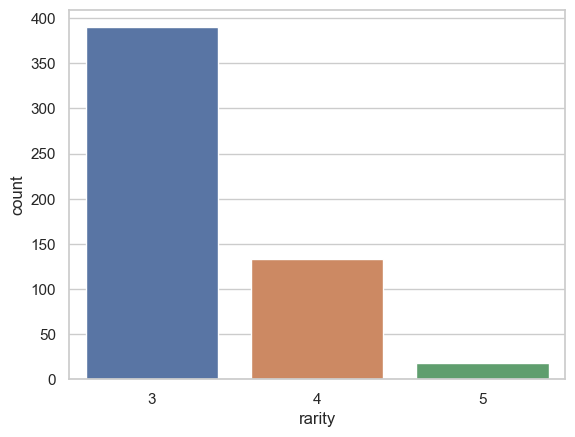

In [13]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["rarity"])
plt.savefig('rarity_countplot.png')

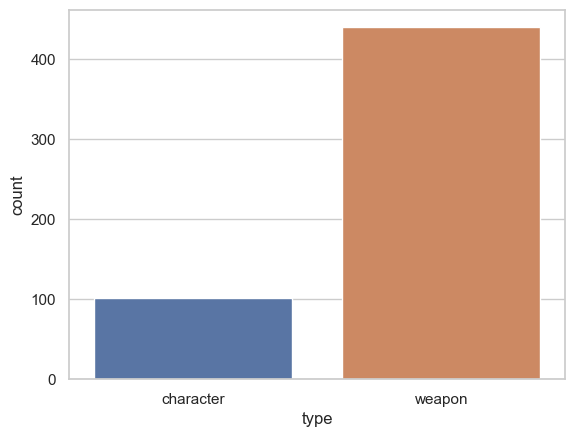

In [14]:
sns.countplot(x=df["type"])
plt.savefig('type_countplot.png')

Проверьте наличие пропусков в данных. Если в каких либо столбцах присутствуют пропуски - заполните их в соответствии со следующим правилом: если значением признака является целое число, заполните значением медианы по данному столбцу; если значением признака является действительное число, заполните средним значением по данному столбцу; иначе заполните значением моды по данному столбцу.
---

In [15]:
buf = pd.isna(df)
buf

,date,item,type,rarity
0,False,False,False,False
1,False,True,False,False
9,False,True,False,False
13,False,False,False,False
23,False,False,False,False
...,...,...,...,...
1173,False,False,False,False
1178,False,False,False,False
1183,False,False,False,False
1184,False,False,False,False


In [16]:
df['item'] = df['item'].fillna(df['item'].mode()[0])
df

,date,item,type,rarity
0,2020-10-01,barbara,character,4
1,2020-10-01,magic guide,weapon,3
9,2020-10-01,magic guide,weapon,4
13,2020-10-01,xiangling,character,4
23,2020-10-01,fischl,character,4
...,...,...,...,...
1173,2022-11-18,layla,weapon,3
1178,2022-11-18,bloodtainted greatsword,weapon,3
1183,2022-11-18,sacrificial greatsword,weapon,3
1184,2022-11-19,debate club,weapon,3


Выберите произвольный числовой признак, с помощью среза данных выберите не более 200 значений соответствующего признака. Проверьте полученную выборку с помощью normaltest на нормальность распределения.
---

In [17]:
buf = df['rarity'][:200]
stats.normaltest(buf)

NormaltestResult(statistic=31.061930163094097, pvalue=1.7988194154469234e-07)

Выполните one-hot кодирование всех категориальных признаков
---

In [18]:
pd.get_dummies(df['item'])

,albedo,arataki itto,barbara,beidou,bennett,black tassel,bloodtainted greatsword,chongyun,cool steel,debate club,...,the widsith,thoma,thrilling tales of dragon slayers,xiangling,xianling,xiao,xingqiu,xinyan,yae miko,yun jin
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1178,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1184,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.to_csv('processed_df.csv')